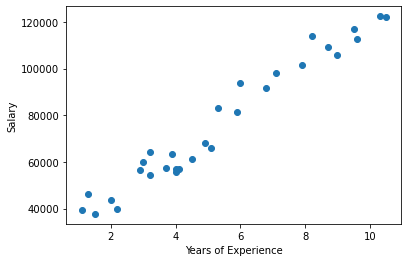

In [43]:
import numpy as np
import pandas as pd
# a. 1st we are importing csv file
df = pd.read_csv('/Users/yaminireddymacherla/Downloads/datasets/Salary_Data.csv')
#we are loading dataframe here to check if there are any null values present in dataframe
df
#next we are plotting the data independent variable(yearsof exp) in x axis & dependent variable(salary) in y-axis
import matplotlib.pyplot as plt
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience, df.Salary)#taking x as independent variable n y as dependent variable
X = df['YearsExperience'].values
y = df['Salary'].values




In [44]:

#b. splitting data to train and test the data using train test split library from sklearn module
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3) #we are splitting data as 70% for training and 30% for testing from x and y
#to reshape training data to 2d for testing
xtest = X_test.reshape(-1,1)
# we are using linear regression model here
from sklearn import linear_model
linearReg = linear_model.LinearRegression()
#c. trying to fit the linear reg model by training with our data(x_train, y_train)
xtrain = X_train.reshape(-1,1)
linearReg.fit(xtrain,y_train)
#c . predict the output for our test data
lr_predict = linearReg.predict(xtest)
#predicted output for testing data
lr_predict


array([ 73289.5314978 ,  54692.70041028, 101184.77812906, 116062.24299907,
        82587.94704155,  69570.16528029,  65850.79906279,  41674.91864903,
        75149.21460655])

In [45]:
#d. calculating mean squared error using Meansquared error module
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,lr_predict))

31330529.373708077


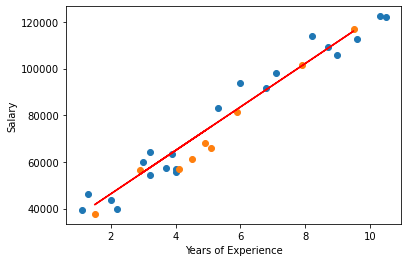

In [50]:
#e. plotting actual and predicted data
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(xtrain,y_train)
plt.scatter(xtest,y_test)
plt.plot(xtest,lr_predict,color='red')




Silhouette Score(n=3): 0.4654852990070092


BALANCE              BALANCE_FREQUENCY           PURCHASES  \
         count         mean             count      mean     count   
Labels                                                              
0         6522   854.900397              6522  0.854264      6522   
1          134  4797.203573               134  0.908474       134   
2         2294  3393.009608              2294  0.940858      2294   

                     ONEOFF_PURCHASES              INSTALLMENTS_PURCHASES  \
                mean            count         mean                  count   
Labels                                                                      
0         603.971424             6522   312.381081                   6522   
1       10470.723657              134  7392.990149                    134   
2        1585.224350             2294   991.414289                   2294   

                     ... CREDIT_LIMIT               PAYMENTS                \
               mean  ...        count          mean    count          mean   
Labels               ...                                                     
0        291.889129  ...         6522   2746.913222     6522    997.098354   
1       3077.897687  ...          134  12470.522388      134  17990.694944   
2        594.122158  ...         2294   8996.906951     2294   2876.115471   

       MINIMUM_PAYMENTS              PRC_FULL_PAYMENT           TENURE  \
                  count         mean            count      mean  count   
Labels                                                                   
0                  6522   585.108730             6522  0.157034   6522   
1                   134  2462.059519              134  0.326800    134   
2                  2294  1564.365058             2294  0.134167   2294   

                   
             mean  
Labels             
0       11.432996  
1       11.843284  
2       11.738012  

[3 rows x 34 columns]

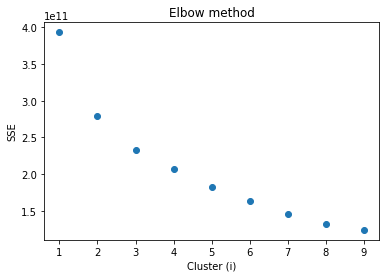

In [55]:
import numpy as np
import pandas as pd
# a. 1st we are importing csv file
data = pd.read_csv('/Users/yaminireddymacherla/Downloads/datasets/K-Mean_Dataset.csv')

#a. replacing null values with mean of that particular column

data.drop('CUST_ID',axis=1,inplace=True)
data.fillna(data.mean(),inplace=True)

#Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for i in range(1,10):
    k_mean = KMeans(n_clusters=i,random_state=9)
    k_mean.fit_predict(data)
    sse[i] = k_mean.inertia_
plt.title('Elbow method')
plt.xlabel('Cluster (i)')
plt.ylabel('SSE')
plt.scatter(list(sse.keys()),list(sse.values()))

kmean_model = KMeans(n_clusters=3,random_state=19)
label = kmean_model.fit_predict(data)

# calculating silhouette score
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(data, label)}')

data['Labels'] = kmean_model.labels_

data.groupby('Labels').agg({'mean','count'})

Silhouette Score(n=3): 0.24996085627555273


BALANCE           BALANCE_FREQUENCY           PURCHASES            \
         count      mean             count      mean     count      mean   
Labels                                                                     
0         6107 -0.366109              6107 -0.178764      6107 -0.234554   
1         1253  0.305126              1253  0.439790      1253  1.510512   
2         1590  1.165728              1590  0.340034      1590 -0.289466   

       ONEOFF_PURCHASES           INSTALLMENTS_PURCHASES            ...  \
                  count      mean                  count      mean  ...   
Labels                                                              ...   
0                  6107 -0.206138                   6107 -0.175784  ...   
1                  1253  1.267068                   1253  1.243340  ...   
2                  1590 -0.206762                   1590 -0.304647  ...   

       CREDIT_LIMIT           PAYMENTS           MINIMUM_PAYMENTS            \
              count      mean    count      mean            count      mean   
Labels                                                                        
0              6107 -0.337125     6107 -0.285057             6107 -0.132510   
1              1253  0.876940     1253  0.823623             1253  0.160882   
2              1590  0.603783     1590  0.445816             1590  0.382170   

       PRC_FULL_PAYMENT           TENURE            
                  count      mean  count      mean  
Labels                                              
0                  6107  0.003447   6107 -0.028419  
1                  1253  0.503013   1253  0.298658  
2                  1590 -0.409640   1590 -0.126202  

[3 rows x 34 columns]

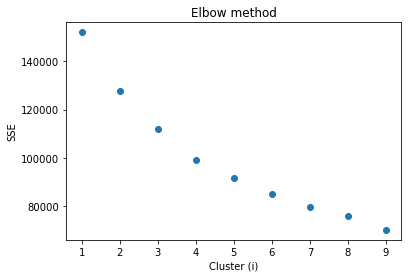

In [54]:
import numpy as np
import pandas as pd
# a. 1st we are importing csv file
data = pd.read_csv('/Users/yaminireddymacherla/Downloads/datasets/K-Mean_Dataset.csv')

#a. replacing null values with mean of that particular column

data.drop('CUST_ID',axis=1,inplace=True)
data.fillna(data.mean(),inplace=True)

#Some features such as ‘PURCHASES’ vary in a wide range, while other features such as ‘PURCHASES_FREQUENCY’ vary between 0 to 1. We need to scale all features on the same range. Here we use StandardScaler() from sklearn to remove mean and scale to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

#Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for i in range(1,10):
    k_mean = KMeans(n_clusters=i,random_state=0)
    k_mean.fit_predict(df_scaled)
    sse[i] = k_mean.inertia_
plt.title('Elbow method')
plt.xlabel('Cluster (i)')
plt.ylabel('SSE')
plt.scatter(list(sse.keys()),list(sse.values()))


#here optimal number of clusters will be 3 from  graph

kmean_model = KMeans(n_clusters=3,random_state=0)
label = kmean_model.fit_predict(df_scaled)

# calculating silhouette score
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(df_scaled, label)}')

df = pd.DataFrame(df_scaled)
df.columns = data.columns
df['Labels'] = kmean_model.labels_

df.groupby('Labels').agg({'mean','count'})



In [ ]:
### Justification: 
    #Silhouette score is the measure for the performance or accuracy of the clustering model ranging from -1 to 1,
    #where 1 is dsaid to be best and -1 is worst. 
    #Here in this model, after feature scaling the Silhoutte score of the model reduced from 0.4654 to 0.2499 
    #this means its quite reduced. 
    #Feature scaling and other methods of normalizing the data will imporove the stability of the model accuracy. 
    #Indeed this is large dataset with many feature variables, so this might require much tuning of the normalization parameters 
    #To improve the score and all the data are much spread with various ranges.